<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Tensorflow-2.x" data-toc-modified-id="Tensorflow-2.x-0.1">Tensorflow 2.x</a></span></li><li><span><a href="#Tensorflow-1.x-でデータをモデルに読み込む" data-toc-modified-id="Tensorflow-1.x-でデータをモデルに読み込む-0.2">Tensorflow 1.x でデータをモデルに読み込む</a></span></li><li><span><a href="#Tensorflow-2.x-でデータをモデルに読み込む" data-toc-modified-id="Tensorflow-2.x-でデータをモデルに読み込む-0.3">Tensorflow 2.x でデータをモデルに読み込む</a></span></li><li><span><a href="#関数デコレータ" data-toc-modified-id="関数デコレータ-0.4">関数デコレータ</a></span><ul class="toc-item"><li><span><a href="#型の指定" data-toc-modified-id="型の指定-0.4.1">型の指定</a></span></li></ul></li></ul></li><li><span><a href="#TFのVariableオブジェクト" data-toc-modified-id="TFのVariableオブジェクト-1">TFのVariableオブジェクト</a></span></li><li><span><a href="#自動微分とGradientTapeによる勾配の計算" data-toc-modified-id="自動微分とGradientTapeによる勾配の計算-2">自動微分とGradientTapeによる勾配の計算</a></span><ul class="toc-item"><li><span><a href="#自動微分" data-toc-modified-id="自動微分-2.1">自動微分</a></span></li><li><span><a href="#訓練可能な変数について損失項の勾配を計算する" data-toc-modified-id="訓練可能な変数について損失項の勾配を計算する-2.2">訓練可能な変数について損失項の勾配を計算する</a></span></li><li><span><a href="#訓練不可能な変数について勾配を計算する" data-toc-modified-id="訓練不可能な変数について勾配を計算する-2.3">訓練不可能な変数について勾配を計算する</a></span></li><li><span><a href="#複数の勾配計算のリソースを保持する" data-toc-modified-id="複数の勾配計算のリソースを保持する-2.4">複数の勾配計算のリソースを保持する</a></span></li></ul></li><li><span><a href="#Keras-APIを使って一般的なアーキテクチャの実装を単純化する" data-toc-modified-id="Keras-APIを使って一般的なアーキテクチャの実装を単純化する-3">Keras APIを使って一般的なアーキテクチャの実装を単純化する</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#全結合層" data-toc-modified-id="全結合層-3.0.1">全結合層</a></span></li></ul></li><li><span><a href="#XOR分類問題を解く" data-toc-modified-id="XOR分類問題を解く-3.1">XOR分類問題を解く</a></span><ul class="toc-item"><li><span><a href="#線形決定境界" data-toc-modified-id="線形決定境界-3.1.1">線形決定境界</a></span></li><li><span><a href="#非線形決定境界" data-toc-modified-id="非線形決定境界-3.1.2">非線形決定境界</a></span></li></ul></li><li><span><a href="#Functional-API" data-toc-modified-id="Functional-API-3.2">Functional API</a></span></li></ul></li></ul></div>

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

TF1.xではセッションは計算グラフの演算やテンソルを実行できる環境であるが、TF2.xでは削除されている（互換性のために`tf.compat.v1.Session`でアクセスできるが）。

In [2]:
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    
    z = 2 * (a-b) + c
    
with tf.compat.v1.Session(graph=g) as sees:
    print('Result : z = ', sees.run(z))
    

Result : z =  1


## Tensorflow 2.x

In [3]:
a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')
z = 2*(a-b)+c
tf.print('Result : z=', z)

Result : z= 1


## Tensorflow 1.x でデータをモデルに読み込む

- TF1-->2の大きな改善点として、データをモデルに読み込む方法がある
    - TF2ではpythonの変数 or numpy の配列の形式でデータを直接提供できる
    - TF1では入力データをモデルに提供するためにプレースホルダーを作成する必要があった

In [4]:
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_a')
    b = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_b')
    c = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_c')
    z = 2*(a-b)+c

with tf.compat.v1.Session(graph=g) as sess:
    feed_dict = {a:1, b:2, c:3}
    print('Result: z = ', sess.run(z, feed_dict=feed_dict))

Result: z =  1


## Tensorflow 2.x でデータをモデルに読み込む

In [5]:
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    
    return z

tf.print(compute_z(1,2,3))
tf.print(compute_z([1],[2],[3]))
tf.print(compute_z([[1]],[[2]],[[3]]))

1
[1]
[[1]]


## 関数デコレータ

`@tf.function` デコレータを用いて計算グラフとしてコンパイルできる

In [6]:
@tf.function
def compute_z(a,b,c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print(type(compute_z(1,2,3)))

<class 'tensorflow.python.framework.ops.EagerTensor'>


デコレータをつけた関数の返り型を見るとわかるように、TensorFlowの型になっている。

また対応するキーを持つ計算グラフがすでに生成されているかどうかは、TensorFlowがチェックしてくれる。その計算グラフが存在しない場合は、新しい計算グラフを生成する。


### 型の指定

階数1のテンソル以外を受け付けない関数をすることができる。

In [7]:
@tf.function(input_signature=(
    tf.TensorSpec(shape=[None], dtype=tf.int32), 
    tf.TensorSpec(shape=[None], dtype=tf.int32), 
    tf.TensorSpec(shape=[None], dtype=tf.int32),))

def compute_z(a,b,c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print(compute_z([1],[2],[3]))
tf.print(compute_z([1,2],[2,4],[3,6]))

# tf.print(compute_z(1,2,3)) ## エラーになる

[1]
[1 2]


# TFのVariableオブジェクト

TFのVariableは訓練中にモデルのパラメータを格納／更新できるようにする特別なtensorオブジェクトである。

In [8]:
a = tf.Variable(initial_value=3.14, name='var_a')
print(a)

b = tf.Variable(initial_value=[1,2,3], name="var_b")
print(b)

c = tf.Variable(initial_value=[True, False], name="var_c", dtype=tf.bool)
print(c)

d = tf.Variable(initial_value=['abc'], name="var_d", dtype=tf.string)
print(d)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>
<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
<tf.Variable 'var_c:0' shape=(2,) dtype=bool, numpy=array([ True, False])>
<tf.Variable 'var_d:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


NNモデルではバックプロパゲーションのときに、重みをランダムな数字で初期化しておく必要がある。
そのときにGlorot初期化、Xavier初期化という手法を使うことができる。

In [9]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3,)))

[-0.722795904 1.01456821 0.251808226]


# 自動微分とGradientTapeによる勾配の計算

ニューラルネットワークを最適化するには、コスト関数の勾配を計算しなければならない。この計算には確率的勾配降下法などの最適化アルゴリズムが必要である。
演算の勾配を計算する方法について議論する。


## 自動微分

任意の算術演算の微分係数または勾配を計算するための手法。このプロセスでは、連鎖率を繰り返し適用しながら勾配を蓄積する。入力が $x$、出力が $y$ の一連の計算について考えてみる $y=f(g(h(x)))$。

## 訓練可能な変数について損失項の勾配を計算する

Tensorflowは自動微分をサポートしている。微分したい関数は、`tf.GradientTape` （勾配テープ）を使って計算を「記録」しなければならない。
まず以下の例では

$$
z = wx + b
$$

$$
L = \sum_i (y_i-z_i)^2
$$

- $w$, $b$ を変数として定義する
- 入力 $x$, $y$ のテンソルとして定義する
- $z$ の計算と損失校は勾配テープのコンテキスト内に配置する

In [14]:
w = tf.Variable(1.0)
b = tf.Variable(0.5)

print(w.trainable, b.trainable)

x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])

# 勾配テープ
with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y-z))

dloss_dw = tape.gradient(loss, w)
tf.print('df/dw:', dloss_dw)

True True
df/dw: -0.559999764


以上の計算は、損失関数を $w$ で微分した結果であるので、実際に計算してみた場合と照らし合わせれば勾配テープで正しく計算できていることが分かる。

In [15]:
tf.print(2*x*(w*x+b-y))

[-0.559999764]


## 訓練不可能な変数について勾配を計算する

tf.GradientTape は訓練可能な辺水については勾配の計算を自動的にサポートするが、訓練可能でない変数やその他のTensorFlowオブジェクトるについては watch メソッドを使って監視する必要がある。

In [16]:
with tf.GradientTape() as tape:
    tape.watch(x)
    z = tf.add(tf.multiply(w,x), b)
    loss = tf.reduce_sum(tf.square(y-z))

dloss_dx = tape.gradient(loss, x)
tf.print(dloss_dx)

[-0.399999857]


## 複数の勾配計算のリソースを保持する

勾配テープをデフォルトで一つの勾配計算しか保持できない。`tf.gradient()`を呼び出した後、それらのリソースは開放され勾配テープは空になる。
したがって複数の勾配を計算したい場合は、勾配テープの永続化が必要となる。

しかし、勾配のテープと記録と保存はメモリ効率が悪い。そのためデフォルトでは`persistent=False`に設定されている。

In [18]:
with tf.GradientTape(persistent=True) as tape:
    z = tf.add(tf.multiply(w,x),b)
    loss = tf.reduce_sum(tf.square(y-z))

dloss_dw = tape.gradient(loss, w)
tf.print("dL/dw", dloss_dw)

dloss_db = tape.gradient(loss, b)
tf.print("dL/db", dloss_db)

dL/dw -0.559999764
dL/db -0.399999857


In [19]:
optimizer = tf.keras.optimizers.SGD()
optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w,b]))

tf.print(w, b)

1.0056 0.504


# Keras APIを使って一般的なアーキテクチャの実装を単純化する

本書でFFNNやSequantialクラスを使って一連の層を定義する例を見てきた。ここではさらに単純化した実装を見てく。

### 全結合層

2層の全結合層（16, 32ユニット）からなるモデルを構築する。

- build で入力の形状を指定する
    - 1層目：16×4 (weight) + 16 (bias) = 80 パラメーター
    - 2層目：16×32 (weight) +32 (bias) = 544 パラメーター
    
※ 重み行列はkernel（カーネル）と表現されている。

`model.build()` を使って入力の形状を指定してモデルを定義したあと、変数を初期化している。

ここで使用する `Sequential` はオブジェクト指向アプローチと呼ばれるもので、後で述べるFunctional APIの関数型のアプローチとは異なる（内容はもちろん同じ）。複雑なモデル構成に対応するには関数型のアプローチが良いとされる。

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

## 遅延変数作成
model.build(input_shape=(None, 4))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  80        
_________________________________________________________________
dense_1 (Dense)              multiple                  544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


変数が作成できたら、訓練可能な変数を訓練可能ではない変数に次のようにアクセスできる。kernelという重み行列とバイアスベクトルがあることが見て取れる。

In [23]:
for v in model.variables:
    print('{:20s}'.format(v.name), v.trainable, v.shape)

dense/kernel:0       True (4, 16)
dense/bias:0         True (16,)
dense_1/kernel:0     True (16, 32)
dense_1/bias:0       True (32,)


これらの層を設定するための手法が様々に定義されている。

- 活性化関数（`tf.keras.activations`）
- 変数イニシャライザ（`tf.keras.initializers`）
- 正則化手法（`tf.keras.regularizers`）：正則化...過学習の抑制

In [25]:
model = tf.keras.Sequential()

## １つ目の層
model.add(tf.keras.layers.Dense(
    units=16,
    activation=tf.keras.activations.relu, # 活性化関数（ReLU）
    kernel_initializer = tf.keras.initializers.glorot_uniform(), # カーネル変数の初期化（Glorot初期化）
    bias_initializer = tf.keras.initializers.Constant(2.0) # バイアス変数を 2.0 で初期化
))

## ２つめの層
model.add(tf.keras.layers.Dense(
    units=32,
    activation=tf.keras.activations.sigmoid, # 活性化関数（シグモイド）
    kernel_regularizer=tf.keras.regularizers.l1 # L1正則化
))

以上で各層の設定するための概要である。それに加えて、モデルをコンパイル時に設定することもできる。

- オプティマイザ（`tf.keras.optimizers`）
- 損失関数（`tf.keras.losses`）
- 訓練データセット、検証データセット、テストデータセットの性能指標（`tf.keras.metrics`）

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), # 確率的勾配降下法
    loss=tf.keras.losses.BinaryCrossentropy(), # 二値分類の交差エントロピー損失関数
    metrics=[ ## 性能指標
        tf.keras.metrics.Accuracy(), # 正解率
        tf.keras.metrics.Precision(), # 適合率
        tf.keras.metrics.Recall(),])    # 再現率

## XOR分類問題を解く


XOR（排他論理和）は、いずれかが真のときに真となり、両方同時に真となる場合に偽となる。

|x|y|class|
|:--:|:--:|:--:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

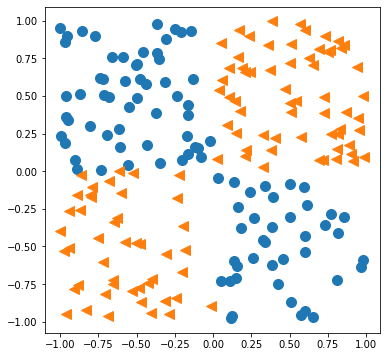

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(1)
np.random.seed(1)

# 200×2 行列の [-1, 1] の乱数を振る
# x という名前だが、実際は (X, Y) 座標を表している
# X と Y の符号が同じか、異なるか、でクラス分けを行っている
x = np.random.uniform(low=-1, high=1, size=(200,2))
y = np.ones(len(x))

y[x[:, 0] * x[:, 1]<0]  = 0

x_train = x[:100, :]
y_train = y[:100]

x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(6, 6))

plt.plot(x[y==0, 0], x[y==0, 1], 'o', markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', markersize=10)

plt.show()

### 線形決定境界

まず、単層のニューラルネットで識別する方法を考えてみる。以下では、これまでのチュートリアルで学んだTensorFlowを使用して分類問題を解く。

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(), 
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

# 各エポックの履歴を返す
hist = model.fit(x_train, y_train,
                validation_data = (x_valid, y_valid),
                epochs=200, batch_size=2, verbose=0)

In [36]:
hist

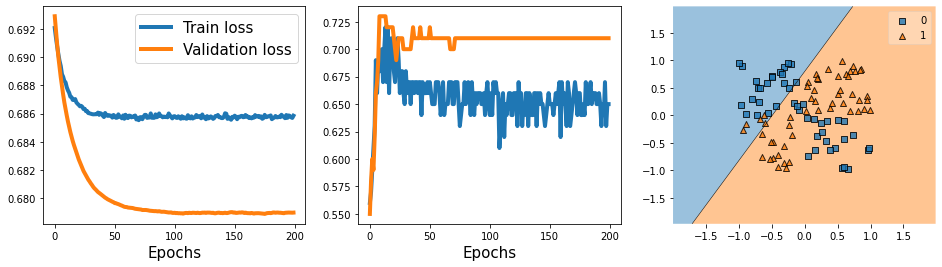

In [46]:
from mlxtend.plotting import plot_decision_regions
history = hist.history

fig = plt.figure(figsize=(16,4))

# -------------------
ax = fig.add_subplot(1,3,1)

plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# -------------------
ax = fig.add_subplot(1, 3, 2)

plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)

ax.set_xlabel('Epochs', size=15)

# -------------------
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
plt.show()

### 非線形決定境界

隠れ層を持たないモデルでは線形の決定境界しか設定できないため、XOR分類問題を解くのは不可能である。よって、非線形の決定境界を抽出するためには、非線形の活性化関数で結合された隠れ層を一つ以上追加することで解決する。

In [47]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(), 
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

# 各エポックの履歴を返す
hist = model.fit(x_train, y_train,
                validation_data = (x_valid, y_valid),
                epochs=200, batch_size=2, verbose=0)

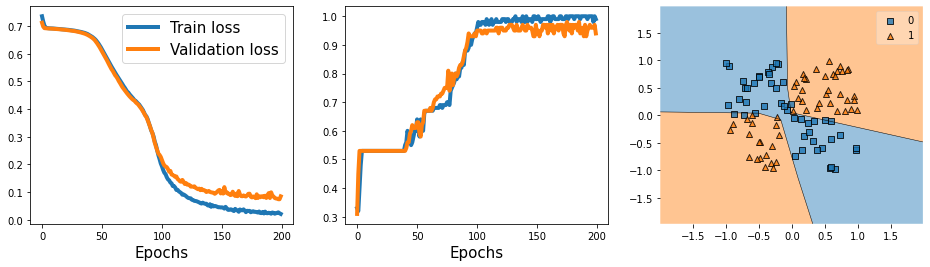

In [49]:
from mlxtend.plotting import plot_decision_regions
history = hist.history

fig = plt.figure(figsize=(16,4))

# -------------------
ax = fig.add_subplot(1,3,1)

plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# -------------------
ax = fig.add_subplot(1, 3, 2)

plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)

ax.set_xlabel('Epochs', size=15)

# -------------------
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
plt.show()

## Functional API

In [51]:
tf.random.set_seed(1)

inputs = tf.keras.Input(shape=(2,))

h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)

outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=0)